In [ ]:
!pip install koreanize-matplotlib fastcluster fastparquet pyarrow
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
mpl.font_manager._log.setLevel(mpl.logging.ERROR)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.7/193.7 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 74.4 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (9,715 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based front

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import koreanize_matplotlib

# matplotlib 설정
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'retina'

# import matplotlib.font_manager as fm
# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)
# plt.rc('font', family='NanumBarunGothic')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error
import tensorflow as tf

NameError: ignored

In [ ]:
import warnings
import matplotlib.pyplot as plt

# Filter out the warning messages
warnings.filterwarnings("ignore", message="Font family 'Arial' not found")

In [ ]:
train = pd.read_csv('/content/drive/Shareddrives/네번째_으싸으싸팀/미니프로젝트/분석중/데이터/train.csv', index_col='ID')
test = pd.read_csv('/content/drive/Shareddrives/네번째_으싸으싸팀/미니프로젝트/분석중/데이터/test.csv', index_col='ID')
submit = pd.read_csv('/content/drive/Shareddrives/네번째_으싸으싸팀/미니프로젝트/분석중/데이터/sample_submission.csv', index_col='ID')

In [ ]:
def summary(df):
    print(f'데이터 shape : {df.shape}')
    df = df.reset_index(drop=True)
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index':'피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    summary['세 번째 값'] = df.loc[2].values
    
    return summary

In [ ]:
summary(train) #calories_burned를 맞춰야하는 문제

데이터 shape : (7500, 10)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,Exercise_Duration,float64,0,30,26.0,7.0,7.0
1,Body_Temperature(F),float64,0,45,105.6,103.3,103.3
2,BPM,float64,0,56,107.0,88.0,86.0
3,Height(Feet),float64,0,4,5.0,6.0,6.0
4,Height(Remainder_Inches),float64,0,13,9.0,6.0,3.0
5,Weight(lb),float64,0,88,154.3,224.9,218.3
6,Weight_Status,object,0,3,Normal Weight,Overweight,Overweight
7,Gender,object,0,2,F,M,M
8,Age,int64,0,60,45,50,29
9,Calories_Burned,float64,0,270,166.0,33.0,23.0


In [ ]:
summary(test)

데이터 shape : (7500, 9)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,Exercise_Duration,float64,0,30,26.0,29.0,11.0
1,Body_Temperature(F),float64,0,44,105.1,104.9,104.0
2,BPM,float64,0,56,107.0,111.0,90.0
3,Height(Feet),float64,0,4,5.0,6.0,5.0
4,Height(Remainder_Inches),float64,0,13,1.0,2.0,9.0
5,Weight(lb),float64,0,84,114.6,198.4,169.8
6,Weight_Status,object,0,3,Normal Weight,Overweight,Normal Weight
7,Gender,object,0,2,F,M,M
8,Age,int64,0,60,45,21,58


In [ ]:
df = pd.concat([train, test])
df.tail(3)

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned
ID,,,,,,,,,,
TEST_7497,24.0,105.1,97.0,5.0,2.0,130.1,Normal Weight,F,42,NaN
TEST_7498,8.0,103.1,83.0,5.0,5.0,134.5,Normal Weight,F,48,NaN
TEST_7499,29.0,105.6,107.0,5.0,1.0,121.3,Normal Weight,F,44,NaN


In [ ]:
def hist(df, col_list):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 5))
    sns.histplot(df[col_list[0]], ax=axes[0][0], bins=50)
    sns.histplot(df[col_list[1]], ax=axes[0][1], bins=50)
    sns.histplot(df[col_list[2]], ax=axes[0][2], bins=50)
    sns.histplot(df[col_list[3]], ax=axes[1][0], bins=50)
    sns.histplot(df[col_list[4]], ax=axes[1][1], bins=50)
    sns.histplot(df[col_list[5]], ax=axes[1][2], bins=50)
    sns.histplot(df[col_list[6]], ax=axes[2][0], bins=50)
    sns.histplot(df[col_list[7]], ax=axes[2][1], bins=50)
    sns.histplot(df[col_list[8]], ax=axes[2][2], bins=50)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)

In [ ]:
#키 열은 단위 합쳐주기
df['Height(Inches)'] = df['Height(Feet)']*12 + df['Height(Remainder_Inches)']
df = df.drop(columns=['Height(Feet)',
       'Height(Remainder_Inches)'])

In [ ]:
train['Height(Inches)'] = train['Height(Feet)']*12 + train['Height(Remainder_Inches)']
train = train.drop(columns=['Height(Feet)',
       'Height(Remainder_Inches)'])

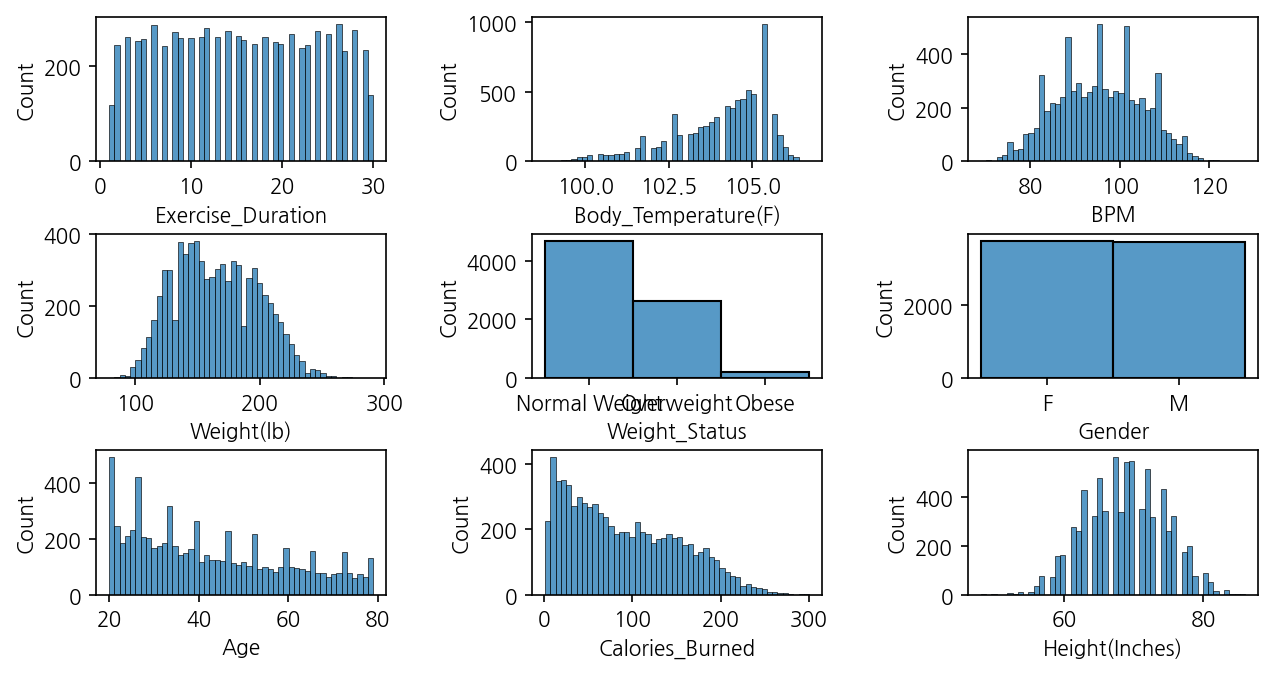

In [ ]:
hist(df.iloc[:7500,:], df.columns) #train

<ipython-input-105-79382f2a926c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot =True, fmt = ',.2f')


<Axes: >

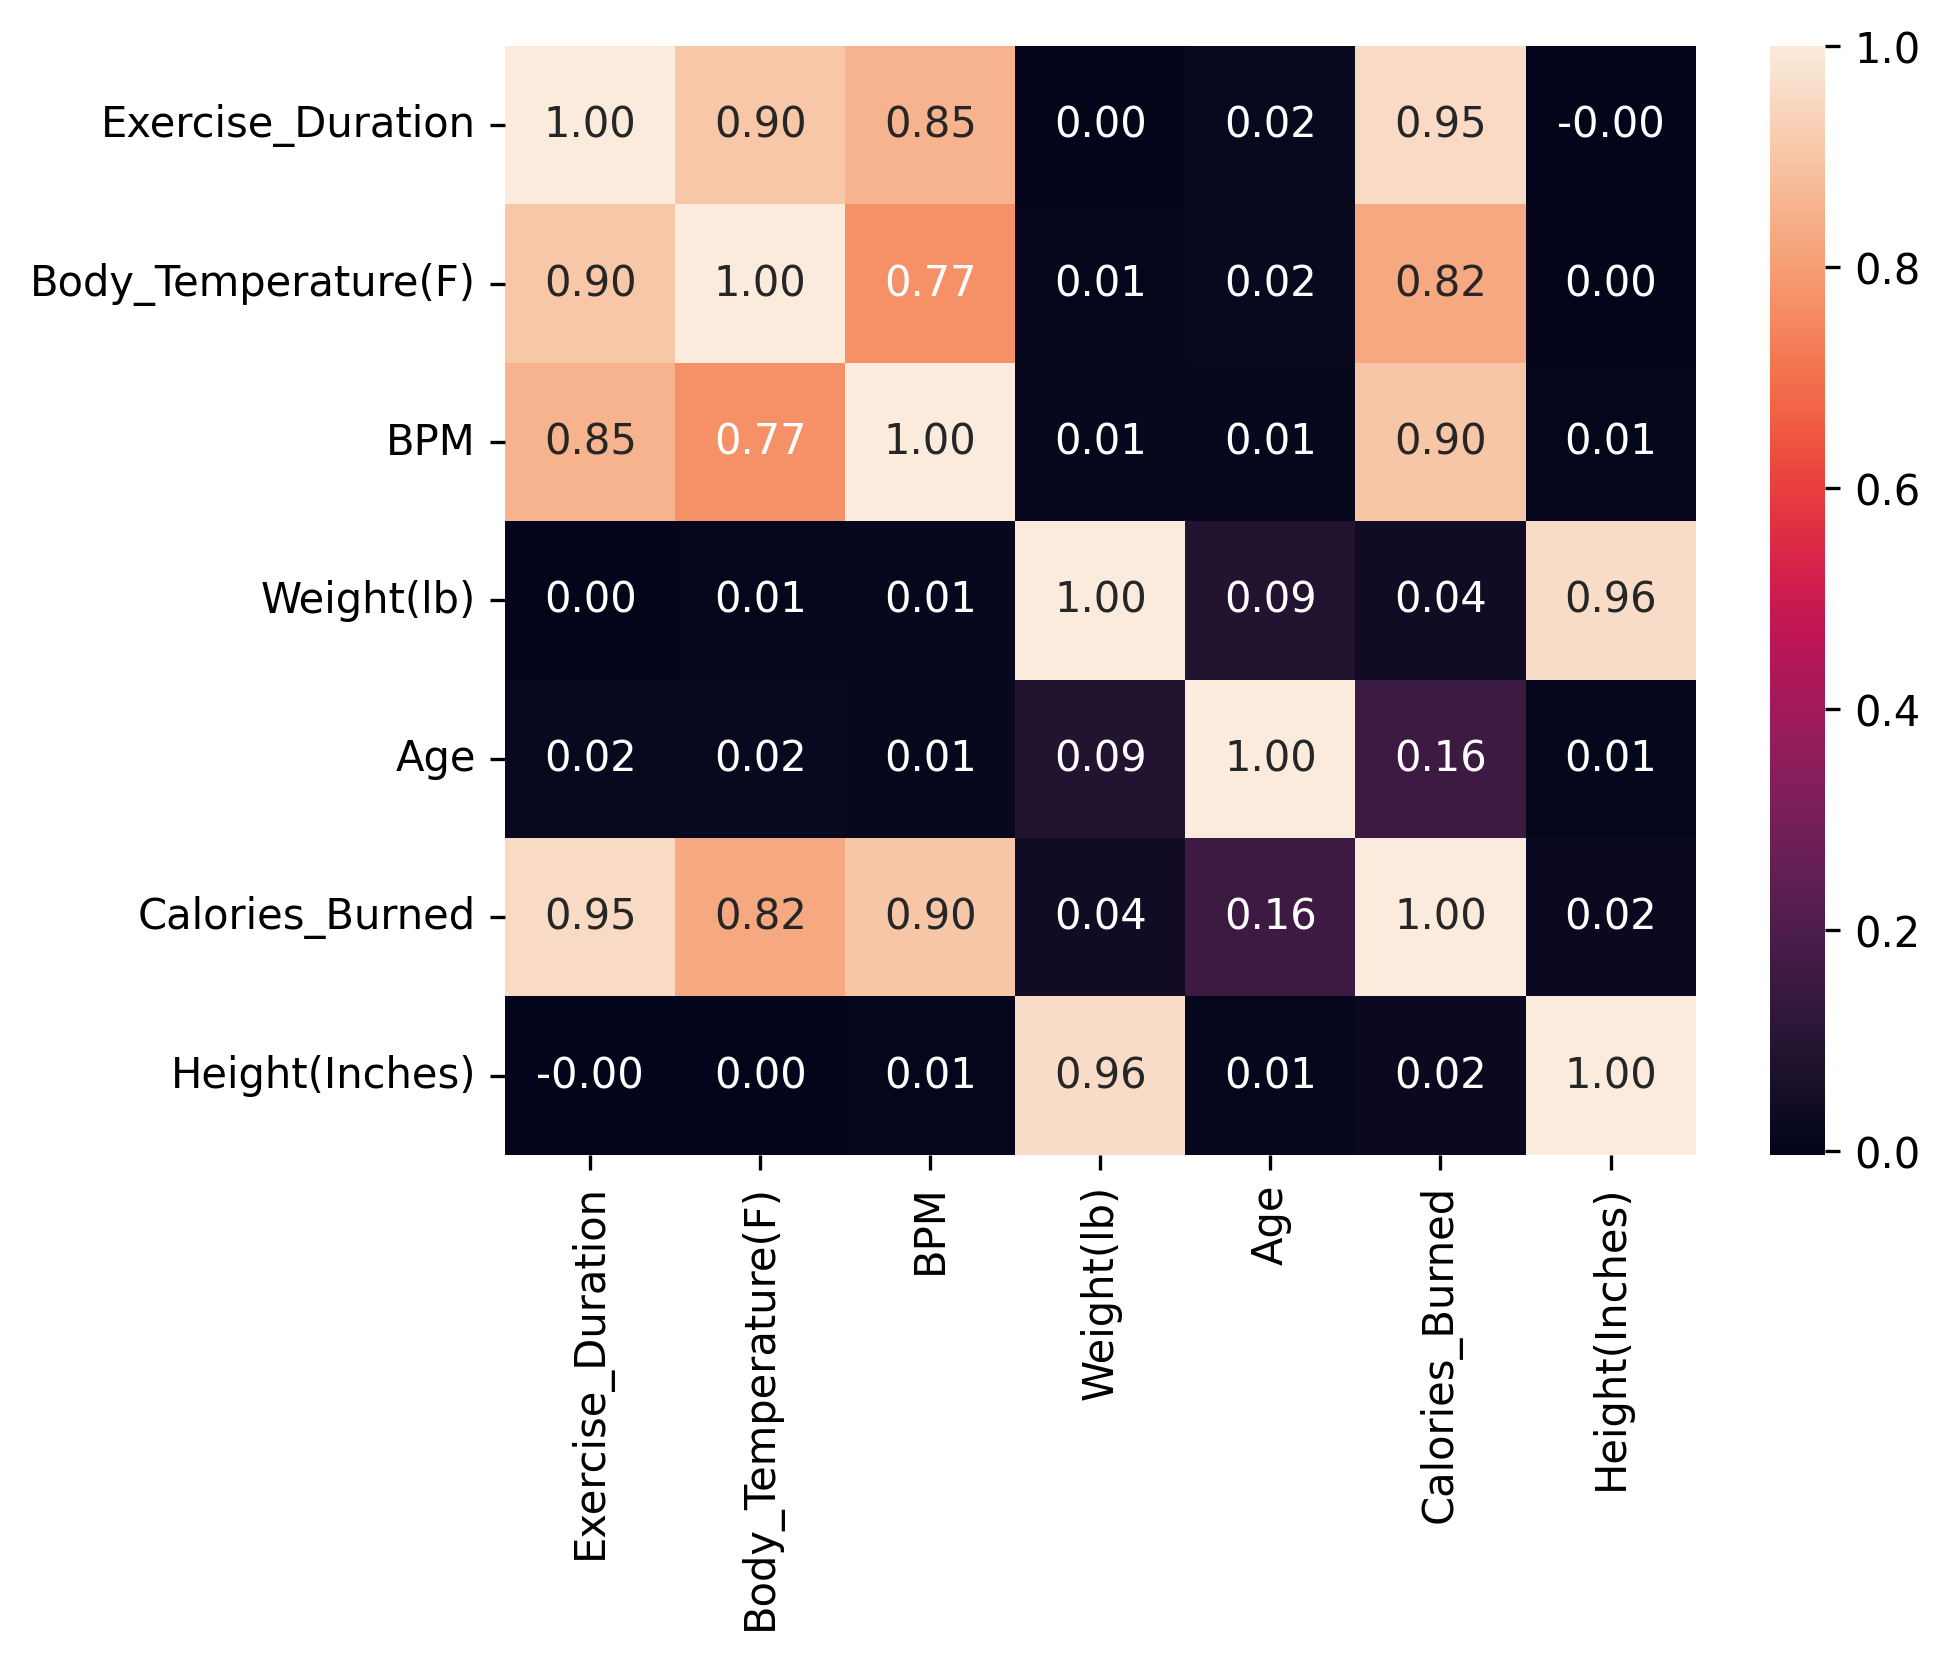

In [ ]:
sns.heatmap(train.corr(), annot =True, fmt = ',.2f') #Exercise Duration, Temperature, BPM이 가장 타깃값과 연관성이 높음

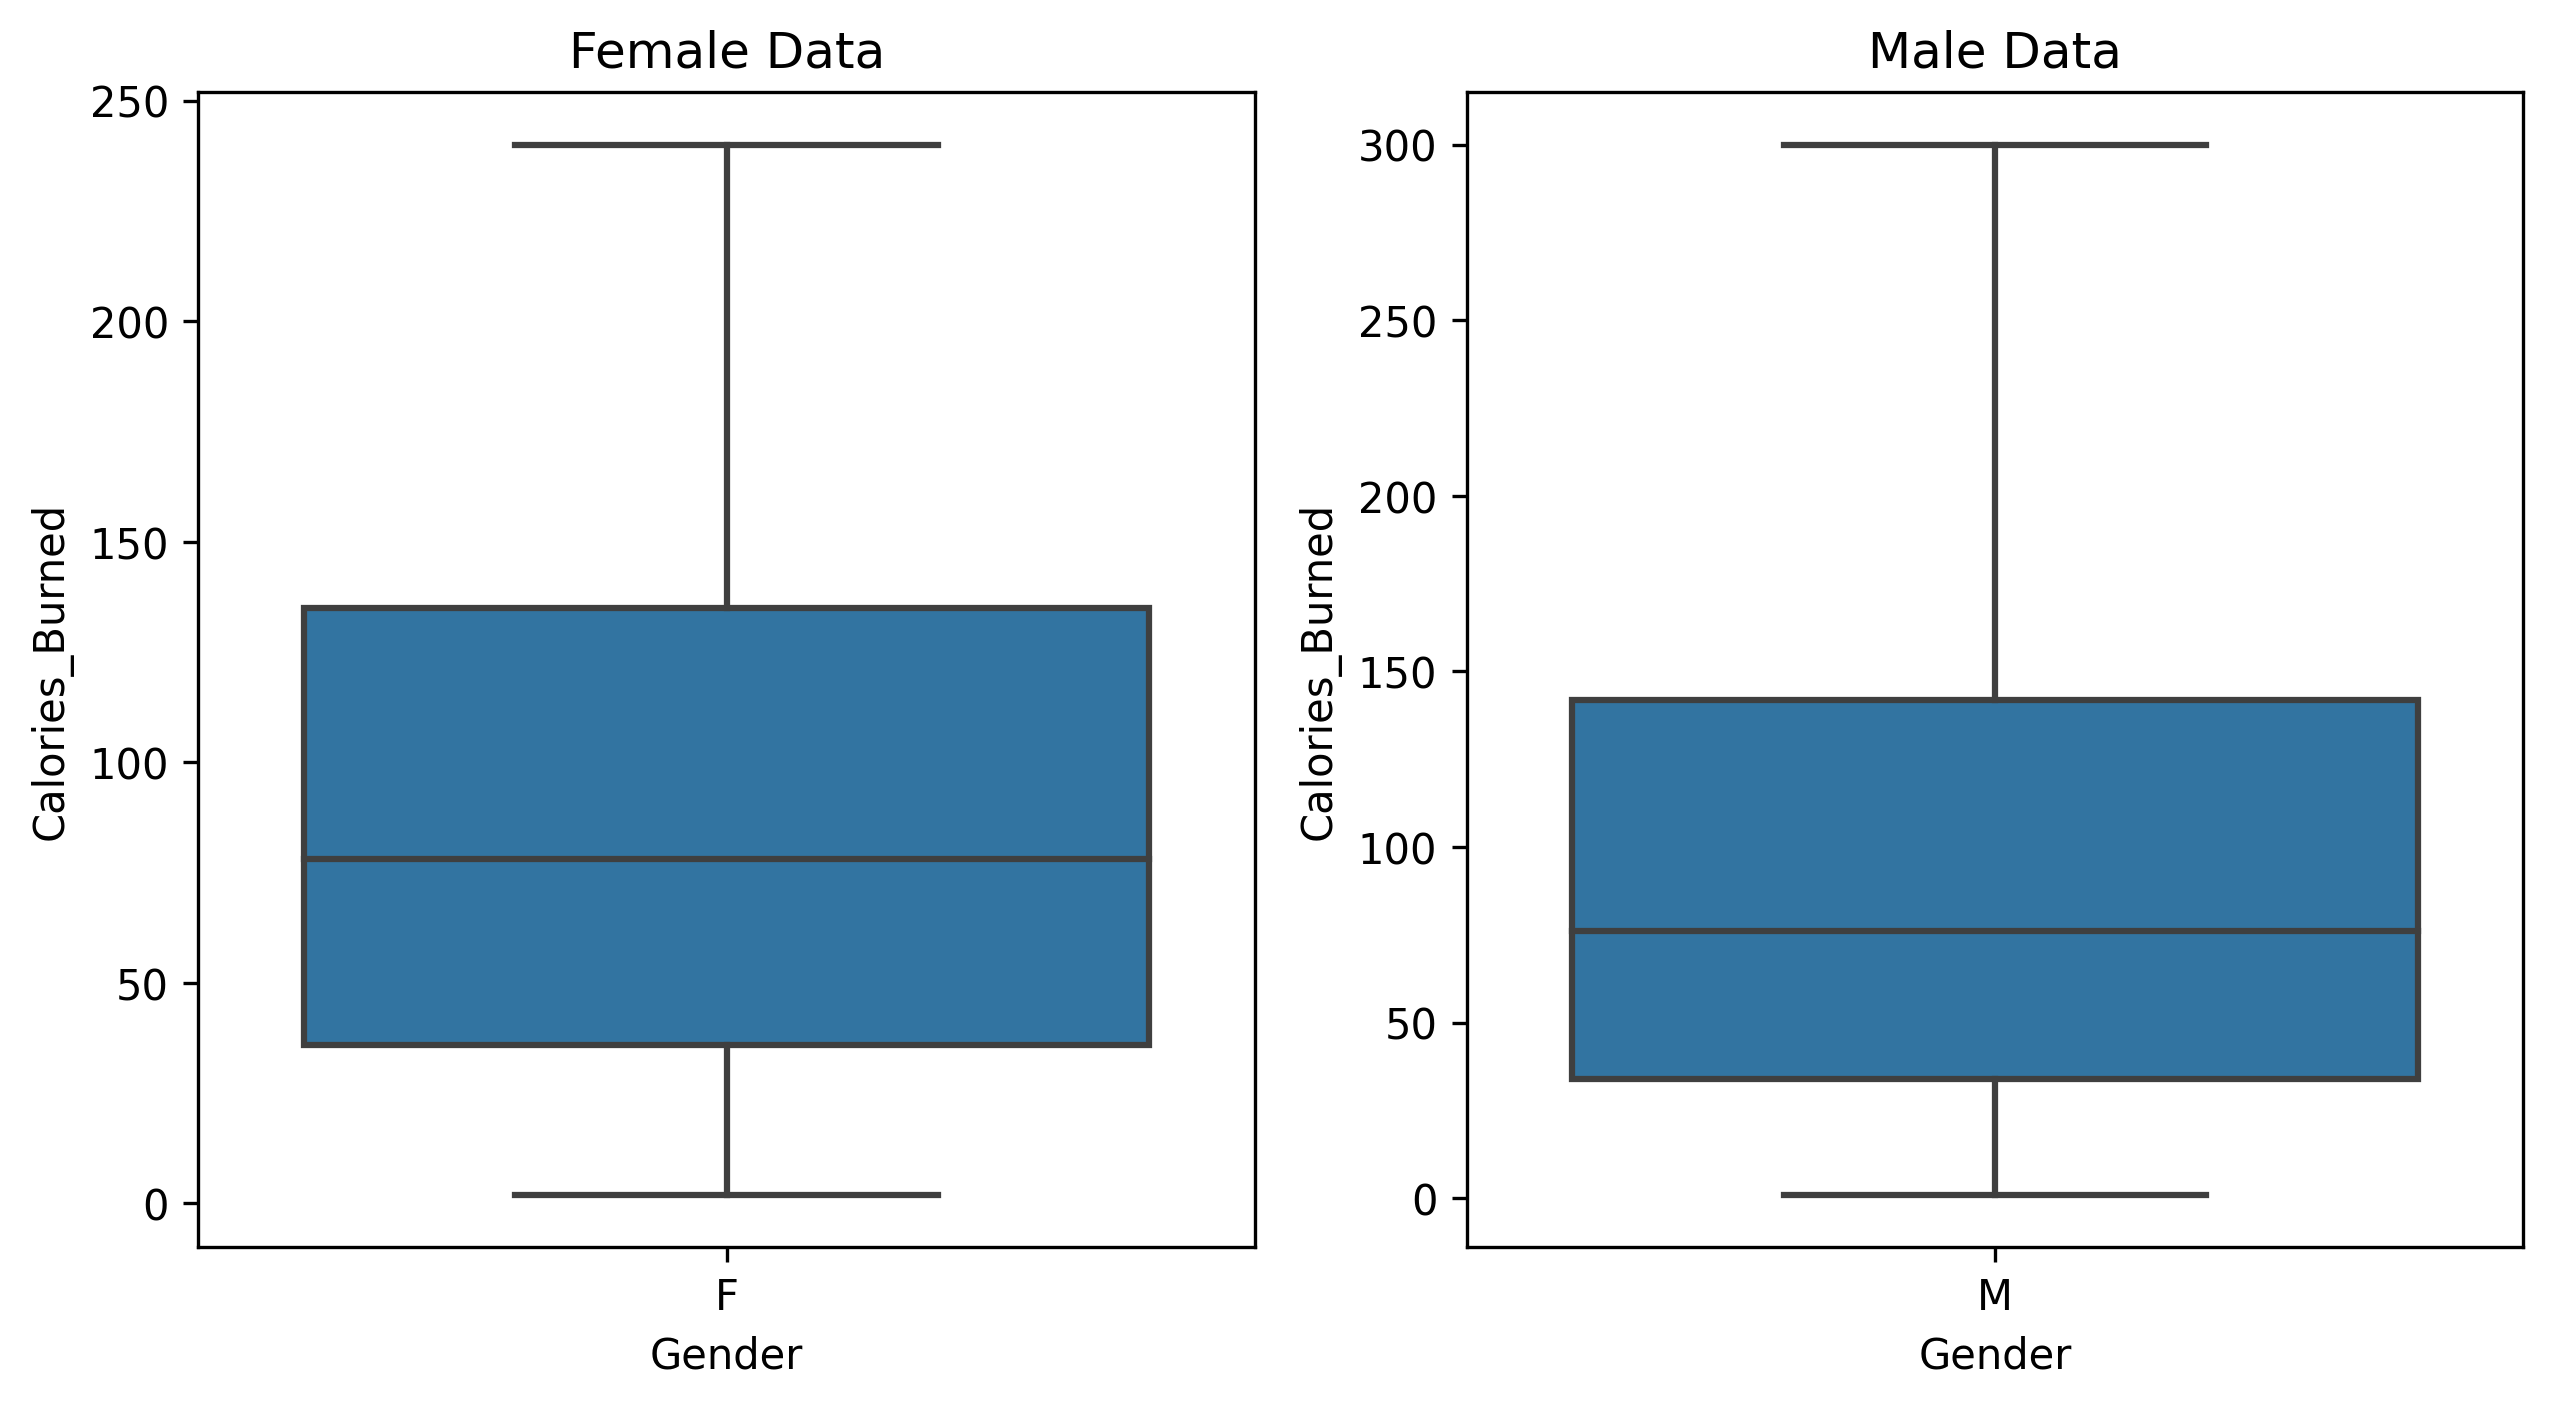

In [ ]:
female_data = train[train['Gender'] == 'F']
male_data = train[train['Gender'] == 'M']

fig, axs = plt.subplots(ncols=2, figsize=(10,5))
sns.boxplot(x='Gender', y='Calories_Burned', data=female_data, ax=axs[0])
sns.boxplot(x='Gender', y='Calories_Burned', data=male_data, ax=axs[1])

axs[0].set_title('Female Data')
axs[1].set_title('Male Data')
plt.show()

In [ ]:
def box(df, col_list):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 5))
    sns.boxplot(df[col_list[0]], ax=axes[0][0])
    axes[0][0].set_title(col_list[0])
    sns.boxplot(df[col_list[1]], ax=axes[0][1])
    axes[0][1].set_title(col_list[1])
    sns.boxplot(df[col_list[2]], ax=axes[0][2])
    axes[0][2].set_title(col_list[2])
    sns.boxplot(df[col_list[3]], ax=axes[1][0])
    axes[1][0].set_title(col_list[3])
    sns.boxplot(df[col_list[4]], ax=axes[1][1])
    axes[1][1].set_title(col_list[4])
    sns.boxplot(df[col_list[5]], ax=axes[1][2])
    axes[1][2].set_title(col_list[5])
    sns.boxplot(df[col_list[6]], ax=axes[2][0])
    axes[2][0].set_title(col_list[6])
    sns.boxplot(df[col_list[7]], ax=axes[2][1])
    axes[2][1].set_title(col_list[7])
    try:
        sns.boxplot(df[col_list[8]], ax=axes[2][2])
        axes[2][2].set_title(col_list[8])
    except:
        pass
    plt.subplots_adjust(hspace=0.5, wspace=0.5)


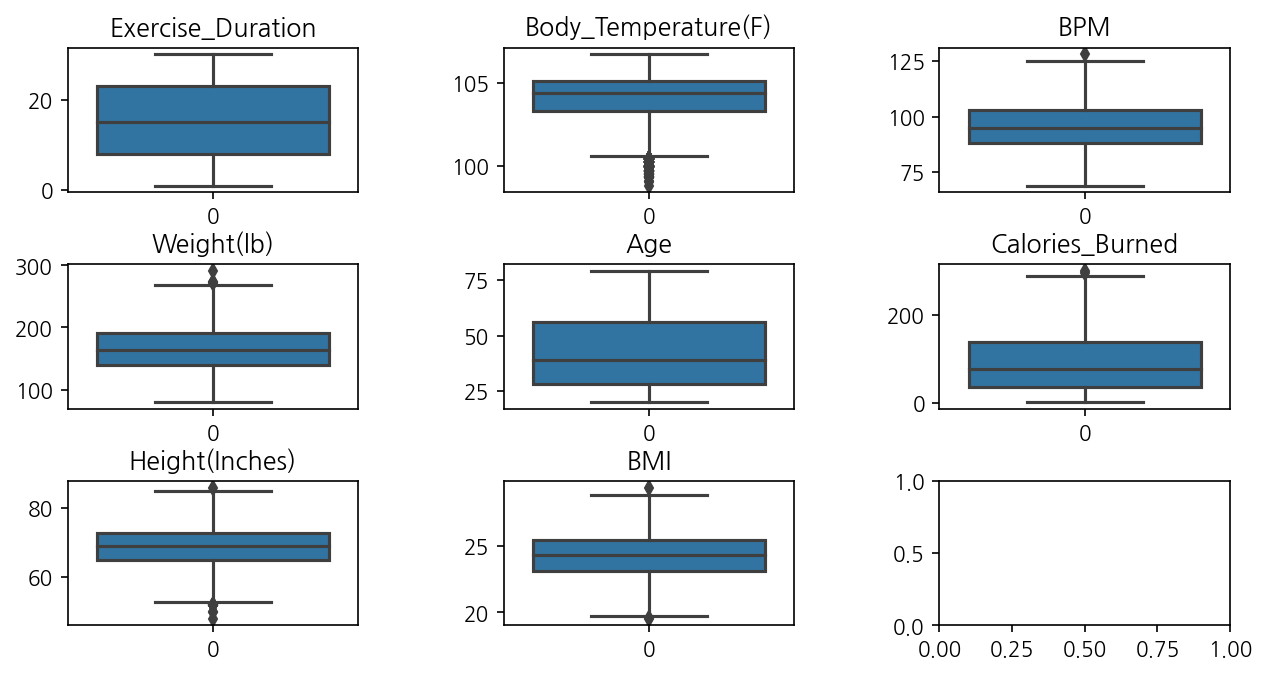

In [ ]:
box(df.iloc[:7500,:], ['Exercise_Duration', 'Body_Temperature(F)', 'BPM', 'Weight(lb)',
       'Age', 'Calories_Burned', 'Height(Inches)',
       'BMI'])

<Axes: ylabel='BMI'>

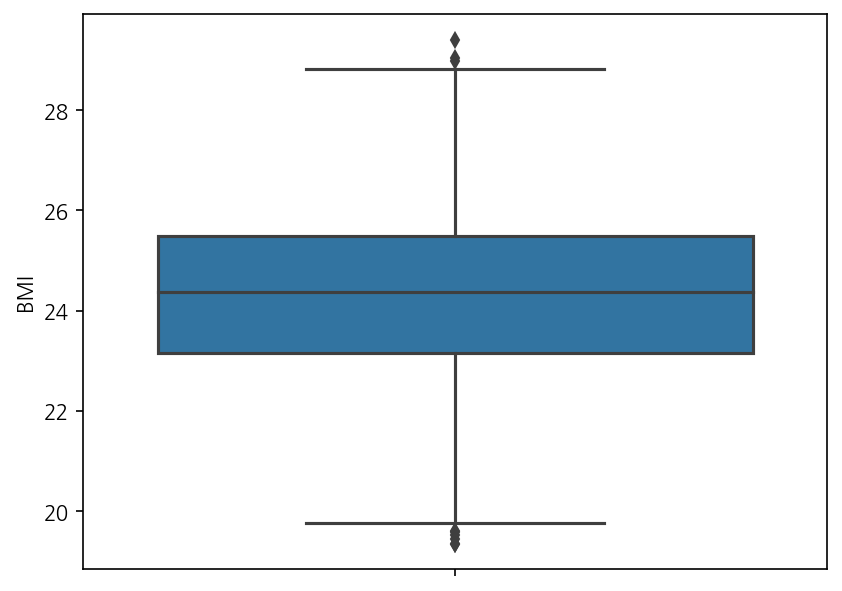

In [ ]:
sns.boxplot(y='BMI', data=df)

<Axes: ylabel='Calories_Burned'>

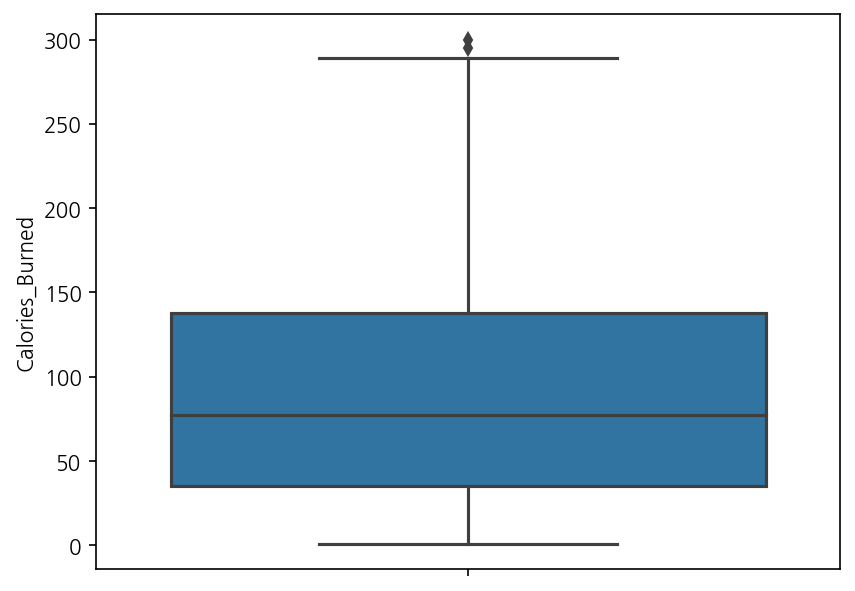

In [ ]:
sns.boxplot(y='Calories_Burned', data=train)

In [ ]:
def outlier(train, column):
    median = train[column].median()
    q1 = train[column].quantile(0.25)
    q3 = train[column].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr #1443.0
    lower_bound = q1 - 1.5 * iqr #347.0
    return train[(train[column] > upper_bound) | (train[column] < lower_bound)]

In [ ]:
outlier(df, 'Calories_Burned')

,Exercise_Duration,Body_Temperature(F),BPM,Weight(lb),Weight_Status,Gender,Age,Calories_Burned,Height(Inches),BMI
ID,,,,,,,,,,
TRAIN_0899,29.0,106.0,121.0,198.4,Normal Weight,M,69,300.0,76.0,24.147368
TRAIN_2089,27.0,105.6,125.0,216.1,Overweight,M,65,295.0,74.0,27.742568


In [ ]:
#gender color code type 만들기
colors = {'M': 'blue', 'F': 'red'}

<ipython-input-32-a344e40ffc61>:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(df[x_vars[i]], df[y_var], s=10, c=[colors[gender] for gender in df['Gender']], cmap='coolwarm')


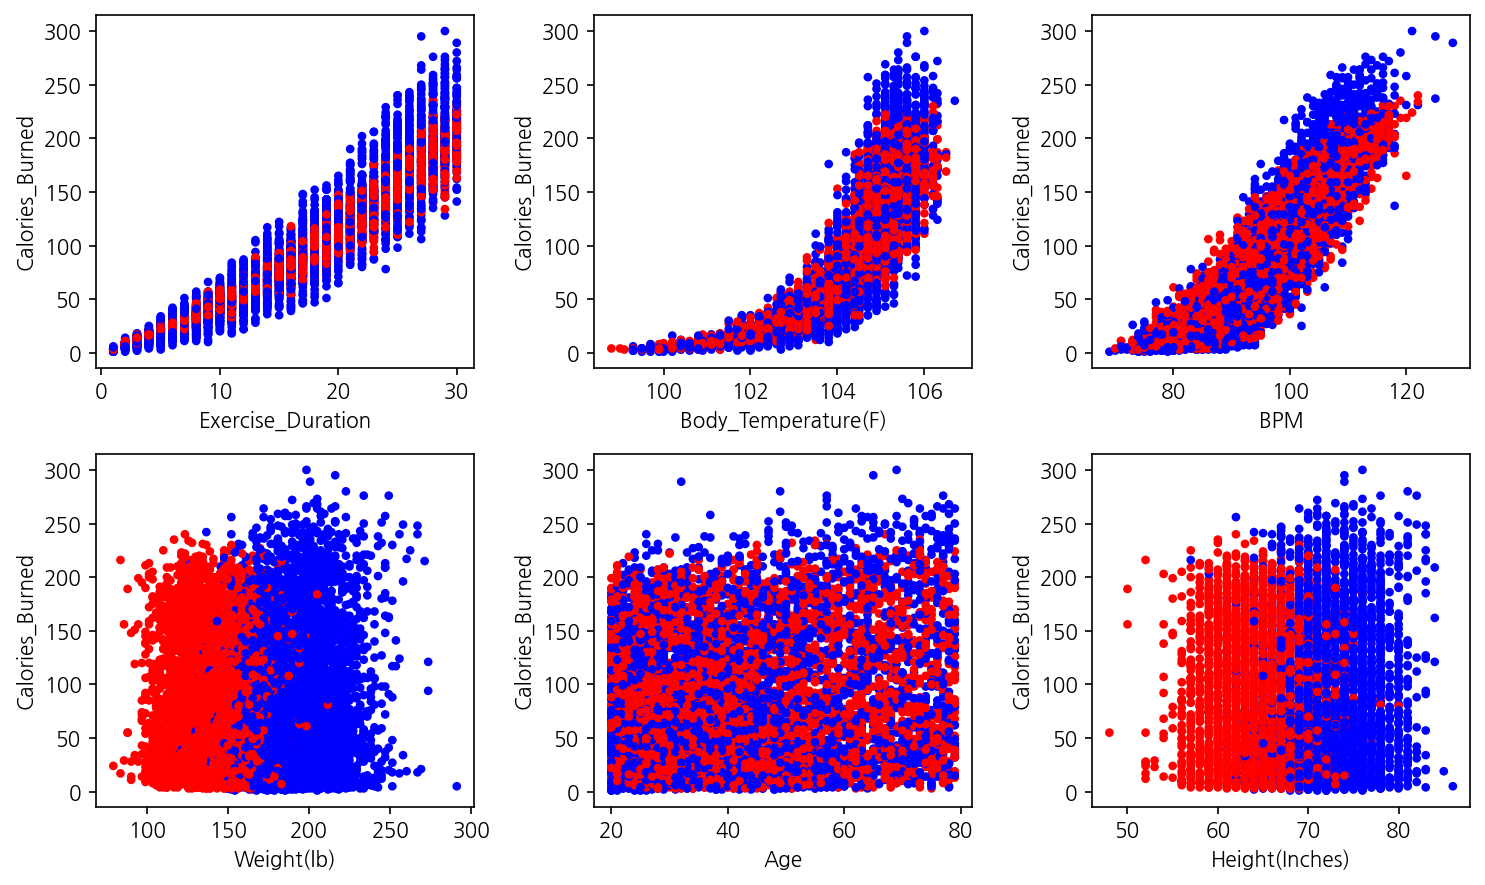

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

x_vars = ['Exercise_Duration', 'Body_Temperature(F)', 'BPM', 'Weight(lb)', 'Age', 'Height(Inches)']
y_var = 'Calories_Burned'

for i, ax in enumerate(axes.flat):
    if i < len(x_vars):
        ax.scatter(df[x_vars[i]], df[y_var], s=10, c=[colors[gender] for gender in df['Gender']], cmap='coolwarm')
        ax.set_xlabel(x_vars[i])
        ax.set_ylabel(y_var)

plt.tight_layout()
plt.show()

In [ ]:
df_M = df_M[df_M['Calories_Burned'].notnull()]

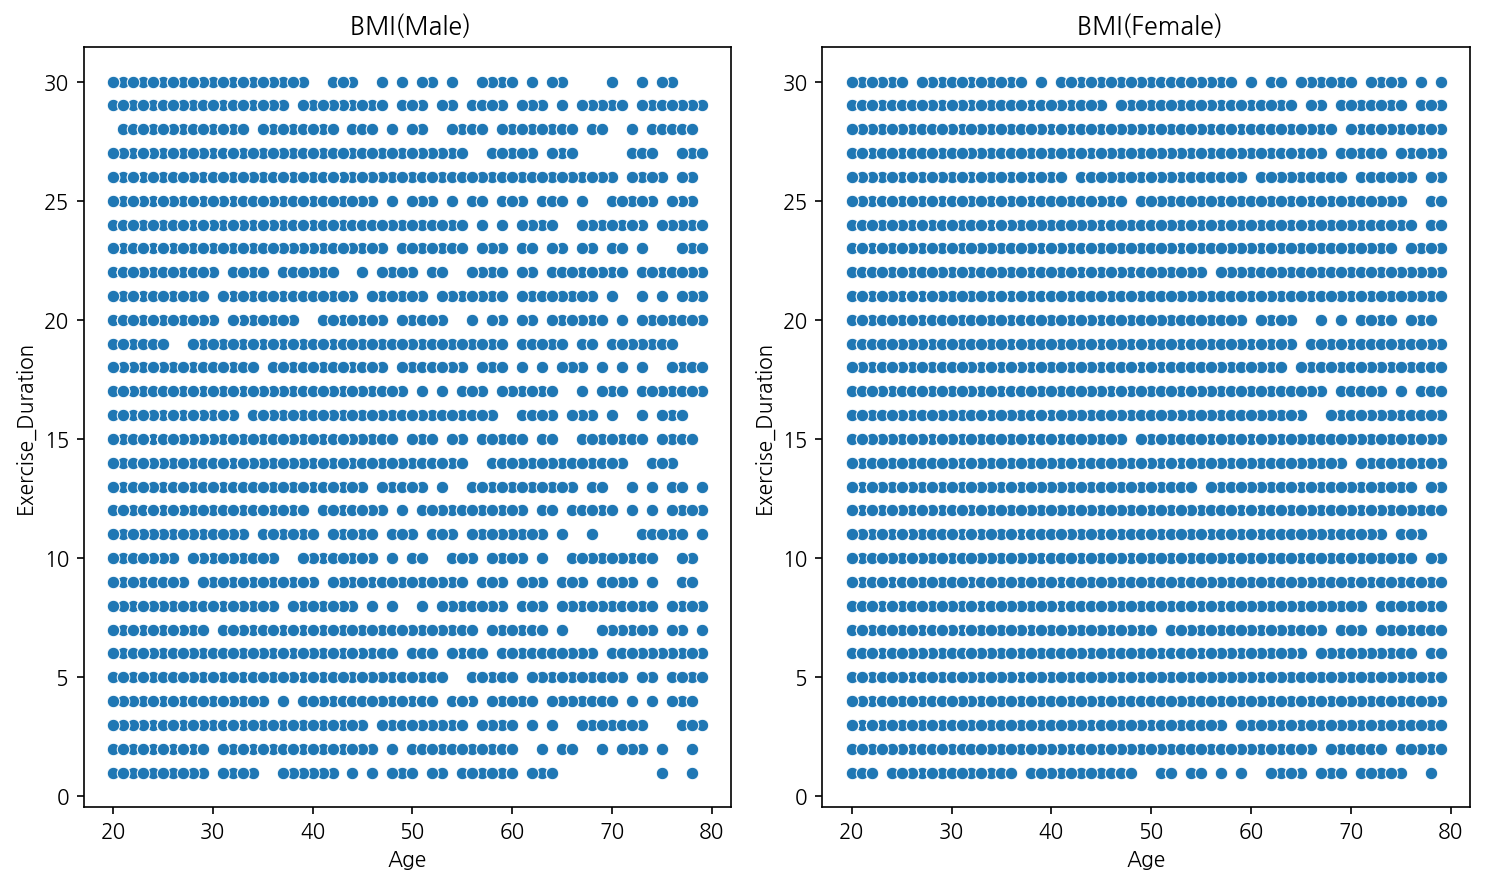

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
sns.scatterplot(data=df_M, x='Age', y='Exercise_Duration', ax=axs[0])
sns.scatterplot(data=df_F, x='Age', y='Exercise_Duration', ax=axs[1])
axs[0].set_title('BMI(Male)')
axs[1].set_title('BMI(Female)')
plt.tight_layout()
plt.show()


<Axes: xlabel='Exercise_Duration', ylabel='Calories_Burned'>

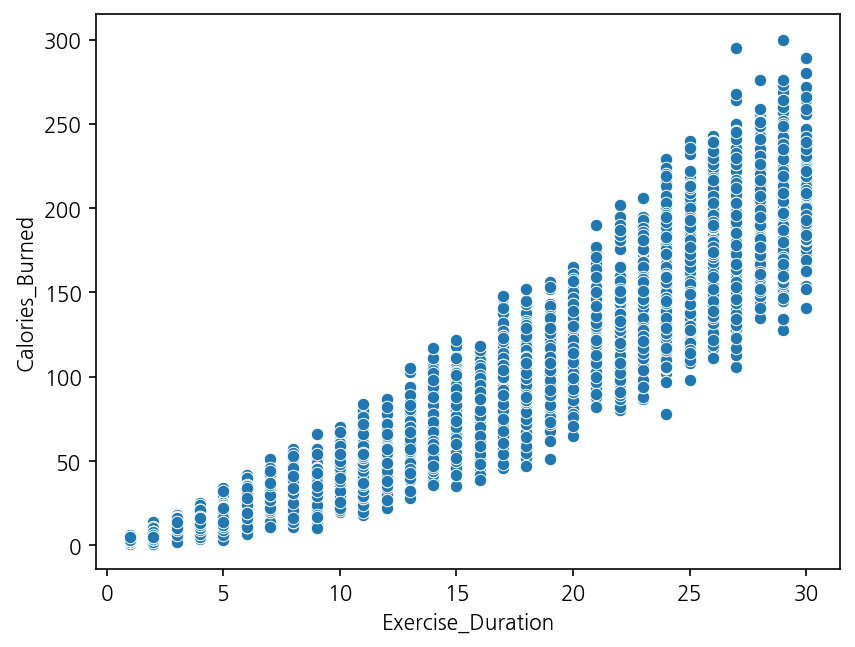

In [ ]:
sns.scatterplot(data=df, x='Exercise_Duration', y='Calories_Burned')

<ipython-input-53-0fd43bee6ee5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot =True, fmt = ',.2f')


<Axes: >

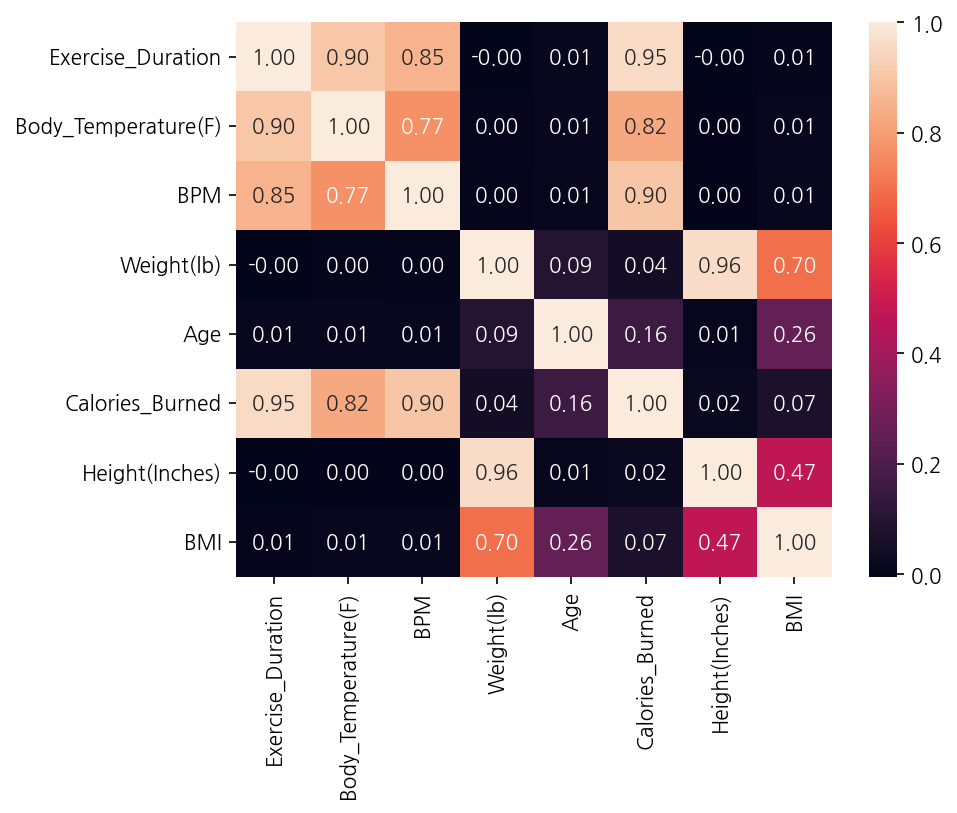

In [ ]:
sns.heatmap(df.corr(), annot =True, fmt = ',.2f')

<ipython-input-41-3e35ad444e07>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_M.corr(), annot=True, fmt=',.2f', ax=axs[0])
<ipython-input-41-3e35ad444e07>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_F.corr(), annot=True, fmt=',.2f', ax=axs[1])


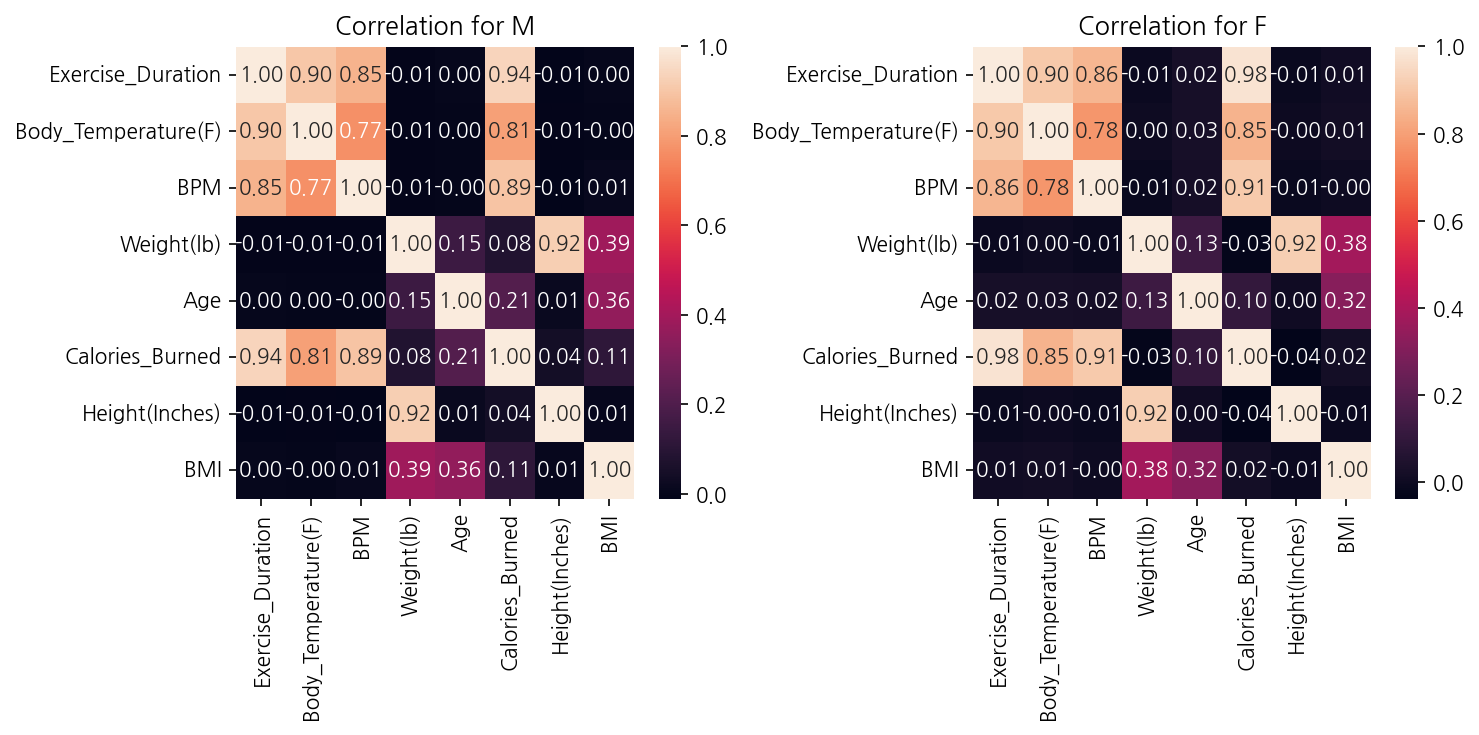

In [ ]:
df_M = df[df['Gender']=='M']
df_F = df[df['Gender']=='F']

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(df_M.corr(), annot=True, fmt=',.2f', ax=axs[0])
axs[0].set_title('Correlation for M')
sns.heatmap(df_F.corr(), annot=True, fmt=',.2f', ax=axs[1])
axs[1].set_title('Correlation for F')
plt.tight_layout()
plt.show()

##파생변수 추가

In [ ]:
#Height
df['Height(Inches)'] = df['Height(Feet)']*12 + df['Height(Remainder_Inches)']
df = df.drop(columns=['Height(Feet)',
       'Height(Remainder_Inches)'])

In [ ]:
#BMI
df['BMI'] = (df['Weight(lb)'] / (df['Height(Inches)'] ** 2)) * 703

In [ ]:
df.head(3)

,Exercise_Duration,Body_Temperature(F),BPM,Weight(lb),Weight_Status,Gender,Age,Calories_Burned,Height(Inches),BMI
ID,,,,,,,,,,
TRAIN_0000,26.0,105.6,107.0,154.3,Normal Weight,F,45,166.0,69.0,22.783638
TRAIN_0001,7.0,103.3,88.0,224.9,Overweight,M,50,33.0,78.0,25.986966
TRAIN_0002,7.0,103.3,86.0,218.3,Overweight,M,29,23.0,75.0,27.282649


## ML XGBoost

In [ ]:
#Label 인코딩 -> Gender
from sklearn.preprocessing import LabelEncoder
gender = df['Gender'].values
le = LabelEncoder()
df['Gender'] = le.fit_transform(gender)
df.head(3)

,Exercise_Duration,Body_Temperature(F),BPM,Weight(lb),Weight_Status,Gender,Age,Calories_Burned,Height(Inches),BMI
ID,,,,,,,,,,
TRAIN_0000,26.0,157.833758,107.0,154.3,Normal Weight,0,1.336753,166.0,69.0,22.783638
TRAIN_0001,7.0,32.705304,88.0,224.9,Overweight,1,1.364055,33.0,78.0,25.986966
TRAIN_0002,7.0,32.705304,86.0,218.3,Overweight,1,1.214110,23.0,75.0,27.282649


In [ ]:
#Scaling
df["Age"] = np.log(df["Age"])
body_temp_mean = df["Body_Temperature(F)"].mean()
body_temp_std = df["Body_Temperature(F)"].std()
df["Body_Temperature(F)"] = (((df["Body_Temperature(F)"] - body_temp_mean) / body_temp_std) + 4)**3

In [ ]:
drop_name = ['Calories_Burned', 'Weight_Status']
label_name = 'Calories_Burned'
X = df.iloc[:7500, :].drop(drop_name, axis=1)
y = df.iloc[:7500, :][label_name]
X_test = df.iloc[7500:, :].drop(drop_name, axis=1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7500 entries, TRAIN_0000 to TRAIN_7499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exercise_Duration    7500 non-null   float64
 1   Body_Temperature(F)  7500 non-null   float64
 2   BPM                  7500 non-null   float64
 3   Weight(lb)           7500 non-null   float64
 4   Gender               7500 non-null   int64  
 5   Age                  7500 non-null   float64
 6   Height(Inches)       7500 non-null   float64
 7   BMI                  7500 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 527.3+ KB


In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor

param = {
    'max_depth':[2,3,4],
    'n_estimators':range(300,600,100),
    'colsample_bytree':[0.5,0.7,1],
    'colsample_bylevel':[0.5,0.7,1],
}
model = xgb.XGBRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param, cv=10, 
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1)

grid_search.fit(X,y)
print(grid_search.best_params_)
{'colsample_bylevel': 0.5, 'colsample_bytree': 0.5, 'max_depth': 3, 'n_estimators': 600}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
             colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=600,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)

{'colsample_bylevel': 1, 'colsample_bytree': 1, 'max_depth': 3, 'n_estimators': 500}


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=0.5, colsample_bynode=None, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
             max_depth=3, max_leaves=None, min_child_weight=1, missing=None,
             monotone_constraints=None, n_estimators=600, n_jobs=1,
             nthread=None, num_parallel_tree=None, objective='reg:linear', ...)

In [ ]:
y_pred = grid_search.predict(X_test)
submit['Calories_Burned'] = y_pred

In [ ]:
submit.to_csv('/content/drive/Shareddrives/네번째_으싸으싸팀/미니프로젝트/제출용/훈영_ML.csv')